### Importing the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

### Loading the Data

In [2]:
# Loading the data using pandas
data = pd.read_csv('Electricity.csv')

### Statistical Summary Of Data

#### Checking for Missing Values

In [3]:
# Check for missing values
data.isnull().sum()

User Name                                      0
Monthly Consumption (kWh)                      0
Heater Average Usage (kWh per hour)            0
Cooler Average Usage (kWh per hour)            0
Fans Average Usage (kWh per hour)              0
Kitchen Appliances (kWh per hour)              0
Electronics Average Usage (kWh per hour)       0
Water heater Average Usage (kWh per hour)      0
Lighting Average Usage (kWh per hour)          0
Heater Energy Efficiency Rating                0
Cooler Energy Efficiency Rating                0
Fans Energy Efficiency Rating                  0
Kitchen Appliances Energy Efficiency Rating    0
Electronics Energy Efficiency Rating           0
Water Heater Energy Efficiency Rating          0
Lighting Energy Efficiency Rating              0
Emission_Electricity                           0
dtype: int64

#### Checking for Data Types

In [4]:
# Check data types
data.dtypes

User Name                                       object
Monthly Consumption (kWh)                        int64
Heater Average Usage (kWh per hour)              int64
Cooler Average Usage (kWh per hour)              int64
Fans Average Usage (kWh per hour)              float64
Kitchen Appliances (kWh per hour)                int64
Electronics Average Usage (kWh per hour)       float64
Water heater Average Usage (kWh per hour)      float64
Lighting Average Usage (kWh per hour)          float64
Heater Energy Efficiency Rating                  int64
Cooler Energy Efficiency Rating                  int64
Fans Energy Efficiency Rating                    int64
Kitchen Appliances Energy Efficiency Rating      int64
Electronics Energy Efficiency Rating             int64
Water Heater Energy Efficiency Rating            int64
Lighting Energy Efficiency Rating                int64
Emission_Electricity                           float64
dtype: object

In [5]:
# Statistical summary
data.describe()

,Monthly Consumption (kWh),Heater Average Usage (kWh per hour),Cooler Average Usage (kWh per hour),Fans Average Usage (kWh per hour),Kitchen Appliances (kWh per hour),Electronics Average Usage (kWh per hour),Water heater Average Usage (kWh per hour),Lighting Average Usage (kWh per hour),Heater Energy Efficiency Rating,Cooler Energy Efficiency Rating,Fans Energy Efficiency Rating,Kitchen Appliances Energy Efficiency Rating,Electronics Energy Efficiency Rating,Water Heater Energy Efficiency Rating,Lighting Energy Efficiency Rating,Emission_Electricity
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,712.919463,11.597315,4.046980,0.079262,11.281879,0.139463,0.546107,0.377114,3.604027,3.429530,3.449664,3.402685,3.463087,3.442953,3.302013,196.928389
std,177.409875,1.639543,1.430061,0.012845,2.272279,0.034637,0.198398,0.127932,1.131961,1.140502,1.159195,1.108441,1.130197,1.067851,1.107131,49.005517
min,416.000000,9.000000,2.000000,0.060000,8.000000,0.080000,0.200000,0.150000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,114.910000
25%,548.000000,10.000000,3.000000,0.070000,9.000000,0.110000,0.390000,0.270000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,151.370000
50%,714.000000,12.000000,4.000000,0.080000,11.000000,0.140000,0.540000,0.370000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,197.230000
75%,883.000000,13.000000,5.000000,0.090000,13.000000,0.170000,0.700000,0.480000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,243.910000
max,999.000000,14.000000,6.000000,0.100000,15.000000,0.200000,0.900000,0.590000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,275.950000


### Data Visualization

#### Correlation Heatmap

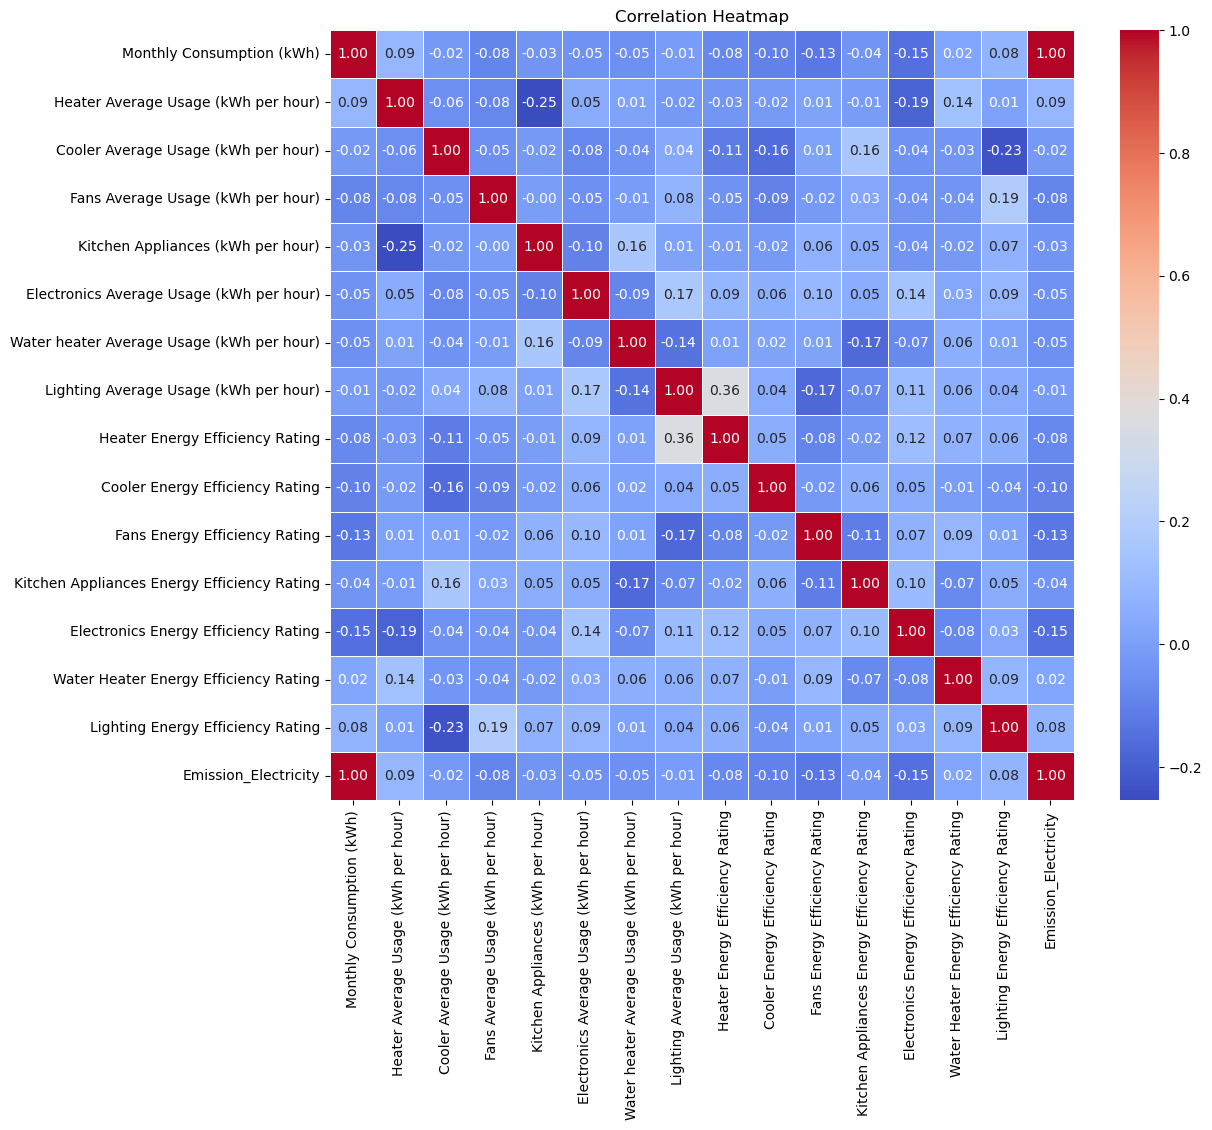

In [6]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### Monthly Energy Consumption Histogram: Depicting the Distribution of Users Based on Their Monthly Energy Usage

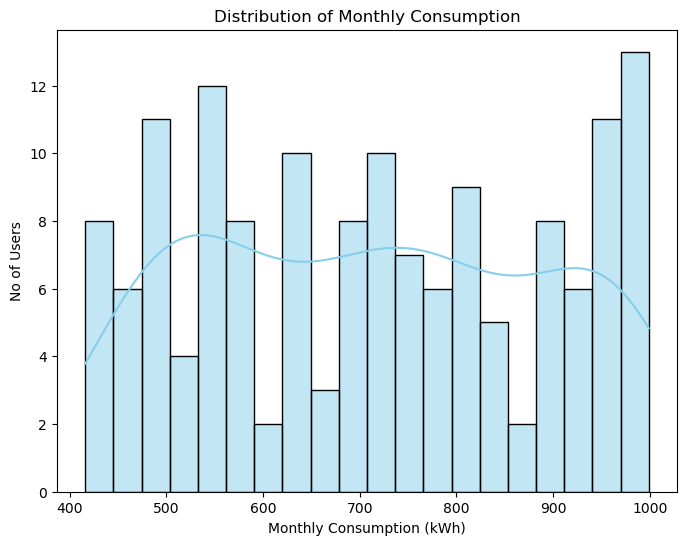

In [7]:
# 2. Distribution of Monthly Consumption
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Consumption (kWh)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Monthly Consumption')
plt.xlabel('Monthly Consumption (kWh)')
plt.ylabel('No of Users')
plt.show()

#### Range of Energy Efficiency Ratings for Appliances Across All Users

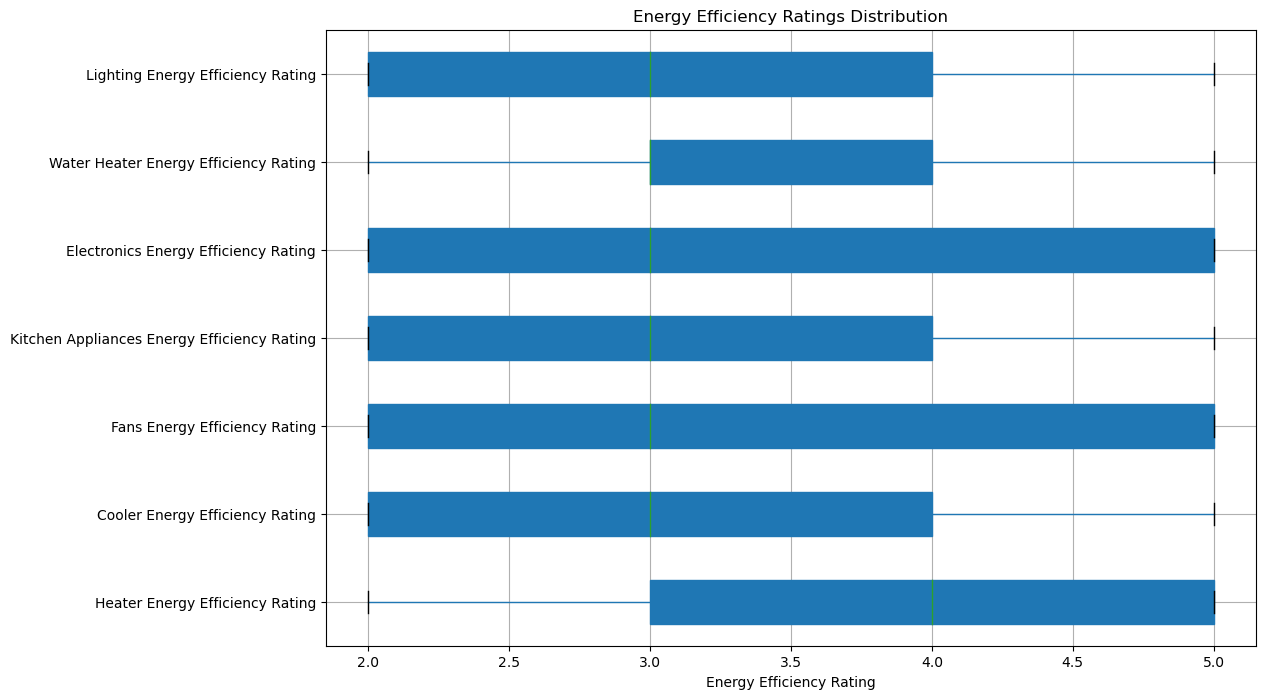

In [8]:
# 3. Energy Efficiency Ratings
ratings_cols = ['Heater Energy Efficiency Rating', 'Cooler Energy Efficiency Rating', 'Fans Energy Efficiency Rating',
                 'Kitchen Appliances Energy Efficiency Rating', 'Electronics Energy Efficiency Rating',
                 'Water Heater Energy Efficiency Rating', 'Lighting Energy Efficiency Rating']

ratings_df = data[ratings_cols]

plt.figure(figsize=(12, 8))
ratings_df.boxplot(vert=False, patch_artist=True)
plt.title('Energy Efficiency Ratings Distribution')
plt.xlabel('Energy Efficiency Rating')
plt.show()

### Applying the Algorithm

In [9]:
from sklearn.preprocessing import StandardScaler
# Selecting relevant features for the model
features = data[['Monthly Consumption (kWh)', 'Heater Average Usage (kWh per hour)',
               'Cooler Average Usage (kWh per hour)', 'Fans Average Usage (kWh per hour)',
               'Kitchen Appliances (kWh per hour)', 'Electronics Average Usage (kWh per hour)',
               'Water heater Average Usage (kWh per hour)', 'Lighting Average Usage (kWh per hour)']]

target = data['Emission_Electricity']

# Standardize the features with feature names
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

###  Linear Regression

In [11]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
# Making predictions on the entire dataset
predictions = model_lin_reg.predict(X_train)

# Calculate accuracy (R-squared)
accuracy = model_lin_reg.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.9999999969206558
Mean Squared Error: 7.52206916445692e-06
Mean Absolute Error: 0.0022594406281648046
R-squared Score: 0.9999999969206558
Explained Variance Score: 0.9999999969206558


### Random Forest Regressor model

In [12]:
# Creating and fitting the Random Forest Regressor model
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_random_forest.predict(X_test)

#Accuracy
accuracy = model_random_forest.score(X_test, y_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.9992248140601206
Mean Squared Error: 1.598822662999918
Mean Absolute Error: 0.861609999999996
R-squared Score: 0.9992248140601206
Explained Variance Score: 0.9992309471450906


### Decision Tree Regressor model

In [13]:
# Creating and fitting the Decision Tree Regressor model
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_decision_tree.predict(X_test)

#Accuracy
accuracy = model_decision_tree.score(X_test, y_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.9984457357570954
Mean Squared Error: 3.2056733333333343
Mean Absolute Error: 1.215333333333336
R-squared Score: 0.9984457357570954
Explained Variance Score: 0.9984592037565632


### Choose the Decision Tree Regressor model, as all the models exhibit commendable accuracy.

### Recommender 

In [14]:
# Option to input new data or select existing user data
user_choice = input('Do you want to input new data (enter "new") or select existing user data (enter "existing")? ')

if user_choice.lower() == 'new':
    # Take input from the user
    user_input = {
        'Monthly Consumption (kWh)': float(input('Enter Monthly Consumption (kWh): ')),
        'Heater Average Usage (kWh per hour)': float(input('Enter Heater Average Usage (kWh per hour): ')),
        'Cooler Average Usage (kWh per hour)': float(input('Enter Cooler Average Usage (kWh per hour): ')),
        'Fans Average Usage (kWh per hour)': float(input('Enter Fans Average Usage (kWh per hour): ')),
        'Kitchen Appliances (kWh per hour)': float(input('Enter Kitchen Appliances (kWh per hour): ')),
        'Electronics Average Usage (kWh per hour)': float(input('Enter Electronics Average Usage (kWh per hour): ')),
        'Water heater Average Usage (kWh per hour)': float(input('Enter Water heater Average Usage (kWh per hour): ')),
        'Lighting Average Usage (kWh per hour)': float(input('Enter Lighting Average Usage (kWh per hour): '))
    }
    # Standardize the user input with feature names
    user_input_scaled = scaler.transform(pd.DataFrame([list(user_input.values())], columns=features.columns))  # Exclude 'Emission_Electricity'

    # Make predictions for the user input
    predicted_emission = model_random_forest.predict(user_input_scaled)
    print(f'\n Carbon Emission: {predicted_emission[0]}\n')

elif user_choice.lower() == 'existing':
    # Take input for user selection
    username = input('Enter the User Name to select existing user data: ')

    # Retrieve existing user data
    user_info = data[data['User Name'] == username].iloc[0]
    emission = user_info["Emission_Electricity"]
    print(f"Monthly Emissions (CO2): {emission}")
else:
    print('\nInvalid choice. Please enter either "new" or "existing".')
    exit()

# Compare with average values and suggest changes (excluding Monthly Consumption)
average_values = [10.5, 3.0, 0.075, 10, 0.1, 0.3, 0.2]

for i, feature in enumerate(features.columns[1:]):  # Exclude Monthly Consumption
    if user_choice.lower() == 'new':
        user_value = user_input[feature]
    else:
        # Extract numeric value from the existing user data pattern
        user_value = float(str(data[data['User Name'] == username][feature].iloc[0]).replace(',', ''))

    avg_value = average_values[i]

    if user_value > avg_value:
        print(f'Warning: Your {feature} usage ({user_value}) is higher than the average ({avg_value}). Check the condition of the appliance. If it is in good condition, consider reducing usage.\n')
    elif user_value < avg_value:
        print(f'Info: Your {feature} usage ({user_value}) is lower than the average ({avg_value}). Your carbon emissions are within an acceptable range.\n')

Do you want to input new data (enter "new") or select existing user data (enter "existing")? existing
Enter the User Name to select existing user data: Kim Smith
Monthly Emissions (CO2): 275.68
Info: Your Heater Average Usage (kWh per hour) usage (9.0) is lower than the average (10.5). Your carbon emissions are within an acceptable range.




Info: Your Water heater Average Usage (kWh per hour) usage (0.24) is lower than the average (0.3). Your carbon emissions are within an acceptable range.


